# Pennylane manual circuit cutting

Experiments with Pennylane manual circuit cutting toolbox.

In [34]:
from functools import partial
import pennylane as qml
from pennylane import numpy as np

Let's define a 3-qubit device and a sample input.

In [35]:
dev = qml.device("default.qubit", wires=3)
x = np.array(0.531, requires_grad=True)
x

tensor(0.531, requires_grad=True)

## Whole circuit

0: ──RX(0.53)─╭●──RY(-0.40)─┤ ╭<Z@Z@Z>
1: ──RY(0.90)─╰Z─╭●─────────┤ ├<Z@Z@Z>
2: ──RX(0.30)────╰Z─────────┤ ╰<Z@Z@Z>


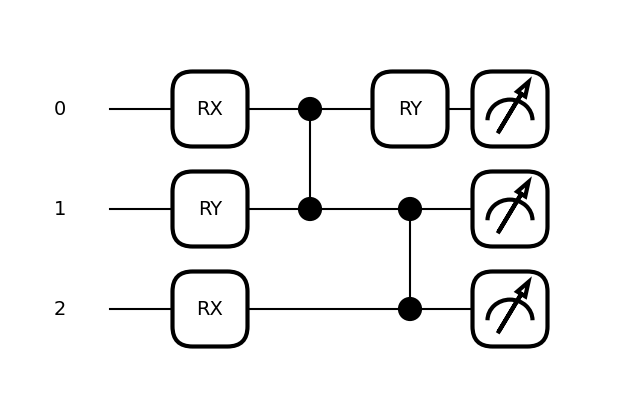

In [42]:
@qml.qnode(dev)
def circuit_without_cut(x):
    qml.RX(x, wires=0)
    qml.RY(0.9, wires=1)
    qml.RX(0.3, wires=2)

    qml.CZ(wires=[0, 1])
    qml.RY(-0.4, wires=0)

    qml.CZ(wires=[1, 2])

    return qml.expval(qml.pauli.string_to_pauli_word("ZZZ"))

print(qml.draw(circuit_without_cut)(x))
fig, ax = qml.draw_mpl(circuit_without_cut)(x)

## Cut circuit

In [49]:
@qml.cut_circuit  # Applying qml.cut_circuit for circuit cut operation
@qml.qnode(dev)
def circuit_cut(x):
    qml.RX(x, wires=0)
    qml.RY(0.9, wires=1)
    qml.RX(0.3, wires=2)

    qml.CZ(wires=[0, 1])
    qml.RY(-0.4, wires=0)

    qml.WireCut(wires=1)  # Cut location

    qml.CZ(wires=[1, 2])

    return qml.expval(qml.pauli.string_to_pauli_word("ZZZ"))

tapes, _ = qml.workflow.construct_batch(circuit_cut)(x)
print("TAPES:", len(tapes))
fig = qml.draw(circuit_cut)(x)
print(fig)
print(tapes[0])
print("\n".join(dir(tapes[0])))


TAPES: 7
0: ──RX(0.53)─╭●──RY(-0.40)─┤ ╭<Z@I> ╭<Z@Z>
1: ──RY(0.90)─╰Z────────────┤ ╰<Z@I> ╰<Z@Z>

0: ──RX(0.53)─╭●──RY(-0.40)─┤ ╭<Z@X>
1: ──RY(0.90)─╰Z────────────┤ ╰<Z@X>

0: ──RX(0.53)─╭●──RY(-0.40)─┤ ╭<Z@Y>
1: ──RY(0.90)─╰Z────────────┤ ╰<Z@Y>

0: ──RX(0.30)─╭Z─┤ ╭<Z@Z>
1: ──I────────╰●─┤ ╰<Z@Z>

0: ──RX(0.30)─╭Z─┤ ╭<Z@Z>
1: ──X────────╰●─┤ ╰<Z@Z>

0: ──RX(0.30)─╭Z─┤ ╭<Z@Z>
1: ──H────────╰●─┤ ╰<Z@Z>

0: ──RX(0.30)────╭Z─┤ ╭<Z@Z>
1: ──H─────────S─╰●─┤ ╰<Z@Z>
<QuantumScript: wires=[0, 1], params=3>
__class__
__copy__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_batch_size
_flatten
_graph
_measurements
_obs_sharing_wires
_obs_sharing_wires_id
_ops
_output_dim
_shots
_specs
_trainable_params
_unflatten
_update
_update_batch_size
_update_

## Running the circuits

In [38]:
circuit_without_cut(x)

tensor(0.47165199, requires_grad=True)

In [39]:
circuit_cut(x)

0.47165198882111165